In [ ]:
from tensorflow.keras.models import Sequential #sequential deep learning model. Next add layers to this sequential model
#Conv2d layer used to extract features from the image,image sharpening,edge detection,etc that helps the model top learn specific characteristics of the image
#Maxpooling2d helps to reduce the size of the data,ie,reduces the dimensions of the images without losing the important features or patterns
#Dropout is done to reduce overfitting(model becomes toooooo good in predicting items from data it was trained on. So it will now become more prone to error when working on external data that it hasn't been trained on
#Flatten transforms a 2d matrix of feautures into a 1d vector that can be fed into a fully connected neural network classifier
#Dense is a classic fully connected(each input node connected to each output node) neural network layer and is used to predict the labels(it can only handle 1d data hence the flatten layer is used to convert the 2d output of the conv2d layer to a 1d vector)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam #optimizer needed to compile the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator #this class is used for image augmentation purpose-->useful technique in neural networks to increase the size of the training set without acquiring new images by duplicating the images with some kind of variation and this process is called augmentation.
import numpy as np #for numerical processing
import matplotlib.pyplot as plt #for visualisation

In [ ]:
#dataset link --> https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset
#login to kaggle->click on profile icon->account->create new API key->kaggle.json file will be downloaded with kaggle username and key to be used in the next two lines of code
import os
os.environ['KAGGLE_USERNAME']='urmikabhattacharya' 
os.environ['KAGGLE_KEY']='3f533c3c21a81f490ad010877e6fbd70'

In [ ]:
#downloading testset direcctly from kaggle
# '!' tells colab that the code after it is a command line code and not python code
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 90% 186M/207M [00:01<00:00, 115MB/s]
100% 207M/207M [00:01<00:00, 133MB/s]


In [ ]:
#unzipping the above downloaded dataset
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')
train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [ ]:
#list of all the mask image files in the train_mask_dir directory(ie, the list of masked images in the Train set)
train_mask_names=os.listdir(train_mask_dir)
train_nomask_names=os.listdir(train_nomask_dir)

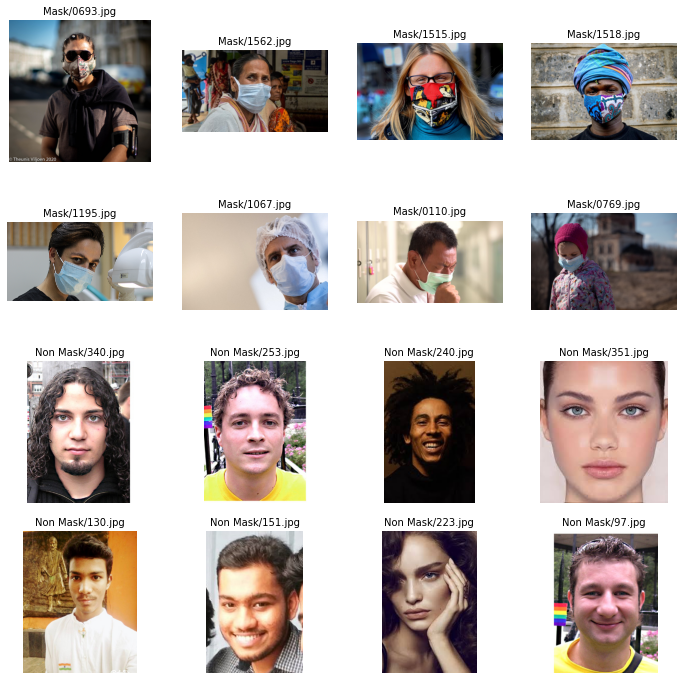

In [ ]:
#image visualisation
#displaying 8 from mask and 8 from non mask from the train set as a 16 image grid
import matplotlib.image as mpimg #provides functionality for loading,rescaling and displaying images
nrows=4
ncols=4
plt.figure(figsize=(12,12))#setting the figure size as 12x12 pixels
mask_pic=[] #this list will contain 8 images from each mask set
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic=[] #this list will contain 8 images from each nomask set
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

#print(mask_pic)
#print(nomask_pic)

merged_list=mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data=merged_list[i].split('/',4)[4] #stores the title of the image of format Mask/123.jpg or Non Mask/123.jpg
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off') #axis set as Off
  image=mpimg.imread(merged_list[i]) #imread used to read image data
  sp.set_title(data,fontsize=10) #setting title
  plt.imshow(image,cmap='gray')

plt.show() #to display the images


In [ ]:
#performing data augmentation.Augementation will also help to reduce the chances of overfitting
#we will have one generator for training set, one for test set and one for validation set. So three generators

train_datagen=ImageDataGenerator(rescale=1./255,  #rescale normalises the pixel values. normalisation is important in CNNs
                                 zoom_range=0.2,  #zoom range augmented to 20%. It will be like selecting some random parts from images by zooming into diff parts of the images by 20% and selecting those parts as new images for the train set
                                 rotation_range=40, #rotation of the image by 40 degree to get new images
                                 horizontal_flip=True, #horizontally flip the images. not using vertical flipping as there is no need as we will never get iamges with an  upside down human face to predict
                                 ) 
test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=11./255)

train_generator=train_datagen.flow_from_directory(train_dir,  #flow_from_directory used to load the data from the specified directory to the variable. Here from the training dataset directory it will load the images to the train_generator variable
                                                  target_size=(150,150),  #resized the images to 150 by 150 pixels
                                                  batch_size=32,  #batch size is the noo of images we will be feeding at once to the model
                                                  class_mode='binary' # as our output just has two cases-mask and no mask    
                                                  ) 
test_generator=test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150,150),  
                                                  batch_size=32,  
                                                  class_mode='binary'   
                                                  ) 
valid_generator=validation_datagen.flow_from_directory(valid_dir, 
                                                  target_size=(150,150),  
                                                  batch_size=32,  
                                                  class_mode='binary'   
                                                  ) 


Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices #shows the classes it found

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape #see image shape ---> 150,150 is the pixel dimensions and 3 represents the channel. 3 means the image is of rgb type. it would've been channel 1 if are images were greyscale

(150, 150, 3)

In [ ]:
#building the CNN
model=Sequential()
#adding the convolution layer
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))  #32 filters of size 3x3
#adding the pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))#pool size (2,2) reduces the image size to half while maintaining the features
#adding dropout layer
model.add(Dropout(0.5)) #dropped out 50% of the neurons to avoid overfitting of data

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#adding the flatten layer
model.add(Flatten())

#adding the dense layers
model.add(Dense(256,activation='relu')) #256 nodes
model.add(Dropout(0.5))

#adding final output layer
model.add(Dense(1,activation='sigmoid'))

#getting the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [ ]:
#compiling the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#training the model
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator,
                    callbacks=callbacks_list
                    )

Epoch 1/30
19/19 [==============================] - 12s 654ms/step - loss: 2.0742 - accuracy: 0.5717 - val_loss: 0.6392 - val_accuracy: 0.6307
Epoch 2/30
19/19 [==============================] - 12s 626ms/step - loss: 0.5639 - accuracy: 0.7167 - val_loss: 0.7045 - val_accuracy: 0.7876
Epoch 3/30
19/19 [==============================] - 12s 634ms/step - loss: 0.3819 - accuracy: 0.8517 - val_loss: 0.7007 - val_accuracy: 0.7974
Epoch 4/30
19/19 [==============================] - 12s 639ms/step - loss: 0.3506 - accuracy: 0.8783 - val_loss: 0.9611 - val_accuracy: 0.7549
Epoch 5/30
19/19 [==============================] - 12s 639ms/step - loss: 0.3073 - accuracy: 0.8883 - val_loss: 0.4775 - val_accuracy: 0.8824
Epoch 6/30
19/19 [==============================] - 12s 647ms/step - loss: 0.2601 - accuracy: 0.9083 - val_loss: 0.6750 - val_accuracy: 0.8856
Epoch 7/30
19/19 [==============================] - 12s 624ms/step - loss: 0.2656 - accuracy: 0.9033 - val_loss: 0.7087 - val_accuracy: 0.8725

In [ ]:
#to visualise the keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

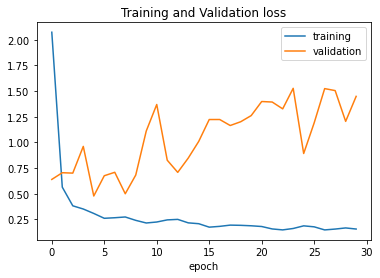

In [ ]:
#plot between training loss(loss) and validation loss(val_loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

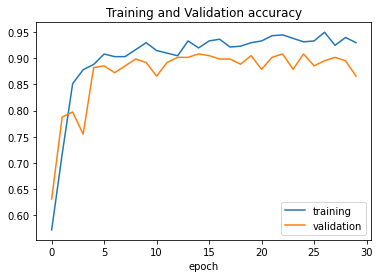

In [ ]:
#plot between training accuracy(accuracy) and validation accuracy(val_accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
#testing
test_loss,test_acc=model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 170ms/step - loss: 0.1946 - accuracy: 0.9400
test loss:0.1945706605911255 test acc:0.9399999976158142


In [ ]:
#Make use of trained model to detect face masks on the static images that is uploaded from local machine
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print("\n\n"+fname)
  if prediction==0:
    print('Wearing Mask')
  else:
    print('Not Wearing Mask')

Saving mask.jpg to mask (1).jpg
Saving no mask.jpg to no mask (1).jpg


mask.jpg
Wearing Mask


no mask.jpg
Not Wearing Mask


In [ ]:
#downloading the trained model to local machine
model.save('model.h5')

In [ ]:
model_json=model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights('model_weights.h5')